In [1]:
library(ggplot2)      # ggplot 및 mpg 데이터 
library(dplyr)        # 데이터 가공


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Removed 105 rows containing missing values (`geom_point()`).”


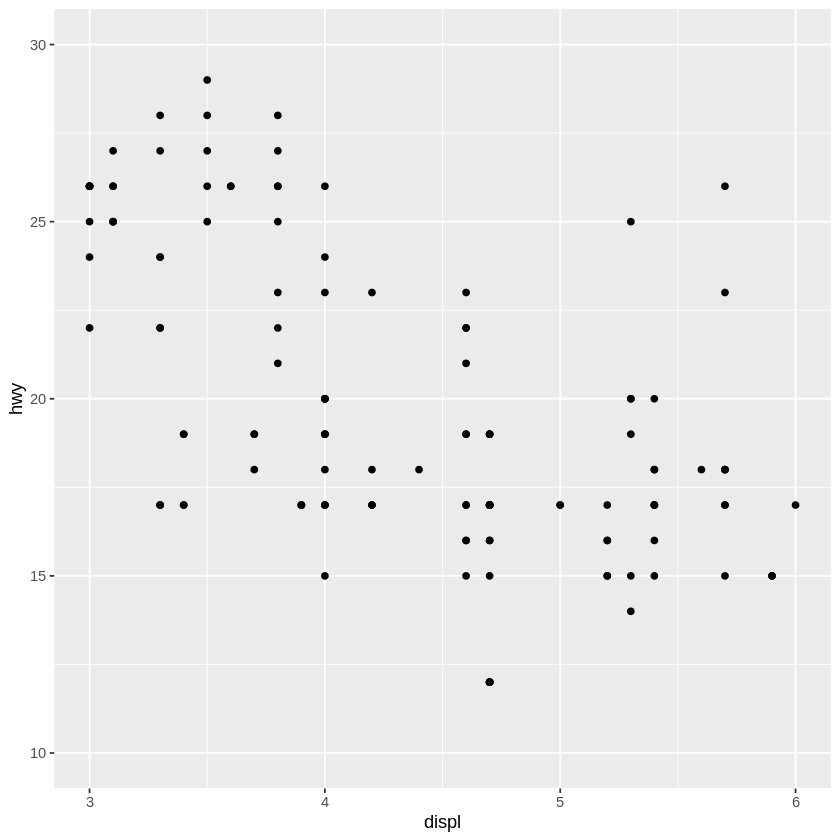

In [2]:
mpg <- as.data.frame(ggplot2::mpg)

# x 축 displ, y 축 hwy 로 지정해 배경 생성
ggplot(data = mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    xlim(3,6) + 
    ylim(10, 30)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
2,562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
3,563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
4,564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
5,565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
6,566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”


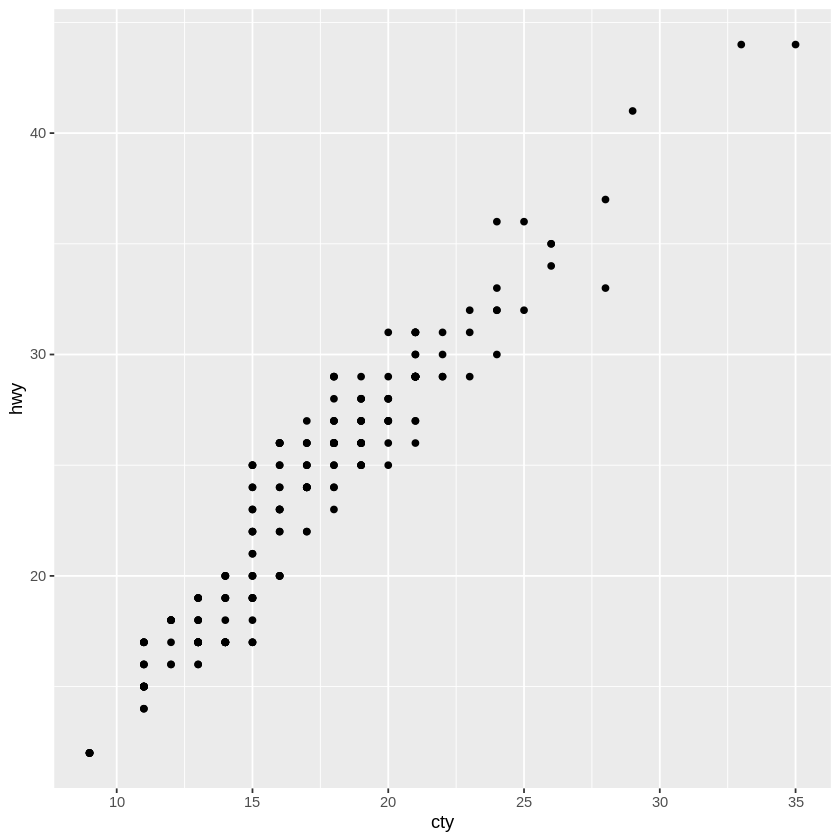

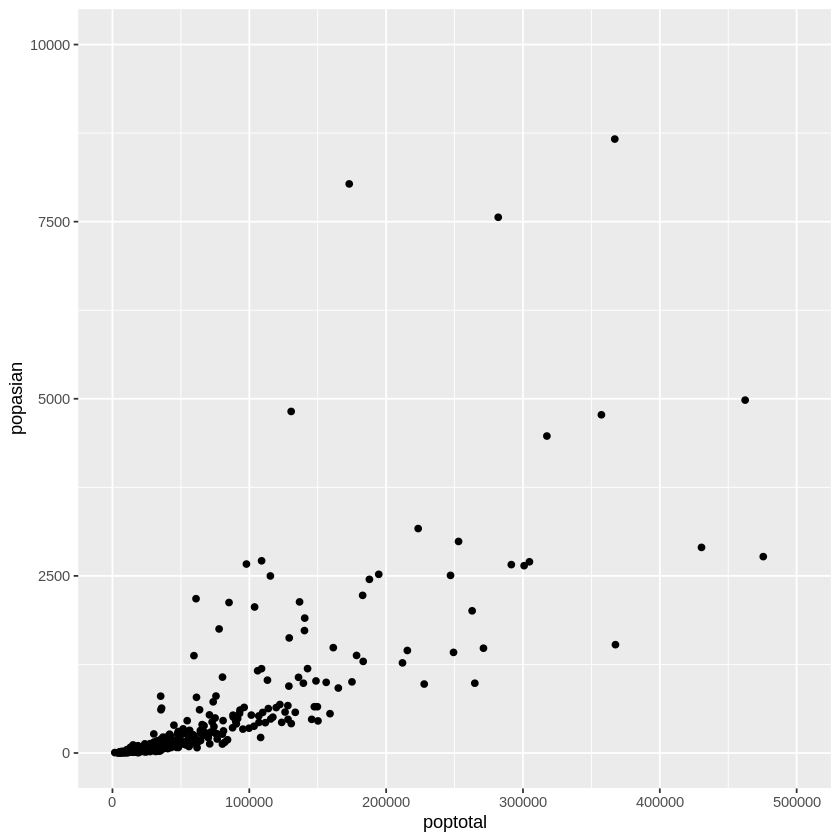

In [4]:
ggplot(data = mpg, aes(x = cty, y = hwy)) +
    geom_point()

# midwest 
options(scipen = 99)
midwest <- as.data.frame(ggplot2::midwest)
head(midwest)
ggplot(data = midwest, aes(x = poptotal, y = popasian)) +
    geom_point() +
    xlim(0,500000) +
    ylim(0,10000)

drv,mean_hwy
<chr>,<dbl>
4,19.17476
f,28.16038
r,21.00000


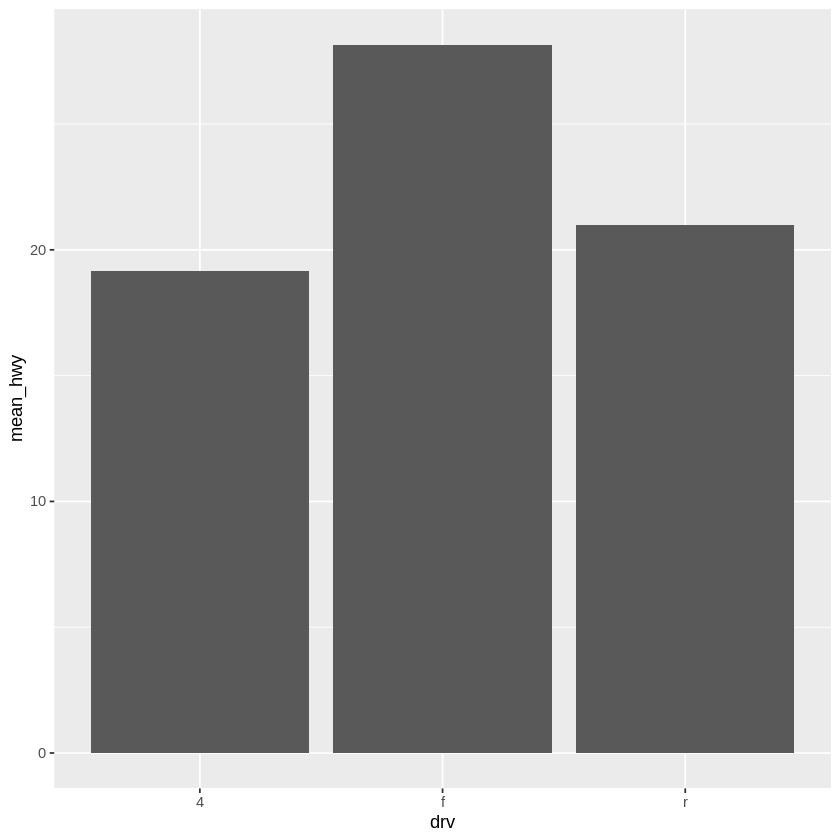

In [5]:
# .. 막대그래프
# 구동방식별 평균 연비
df_mpg <- mpg %>%
    group_by(drv) %>%
    summarise(mean_hwy = mean(hwy))
df_mpg
ggplot(data=df_mpg, aes(x=drv, y=mean_hwy)) + geom_col()

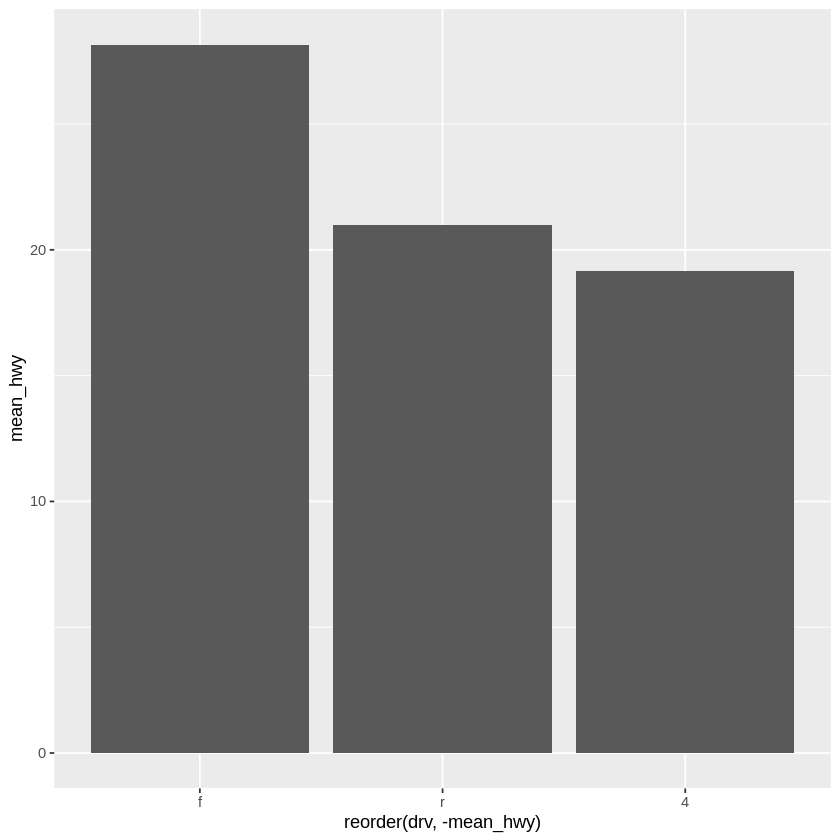

In [6]:
# 내림차순 정렬 reoder( '-' )
ggplot(data=df_mpg, aes(x=reorder(drv, -mean_hwy), y=mean_hwy)) + geom_col()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


manufacturer,mean_cty
<chr>,<dbl>
subaru,18.83333
toyota,14.37500
nissan,13.75000
jeep,13.50000
mercury,13.25000


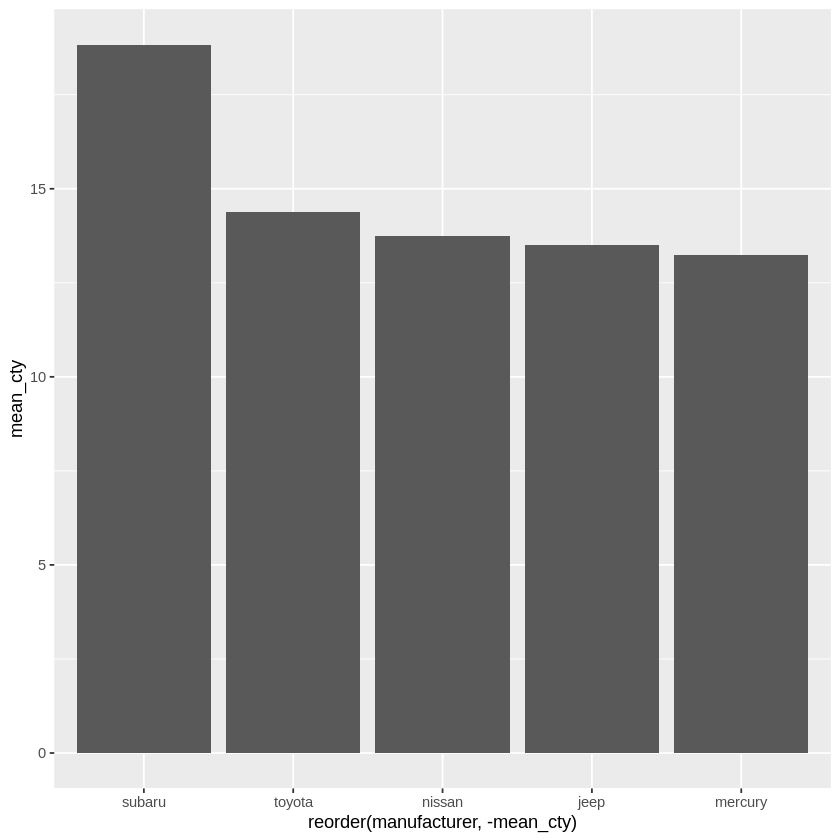

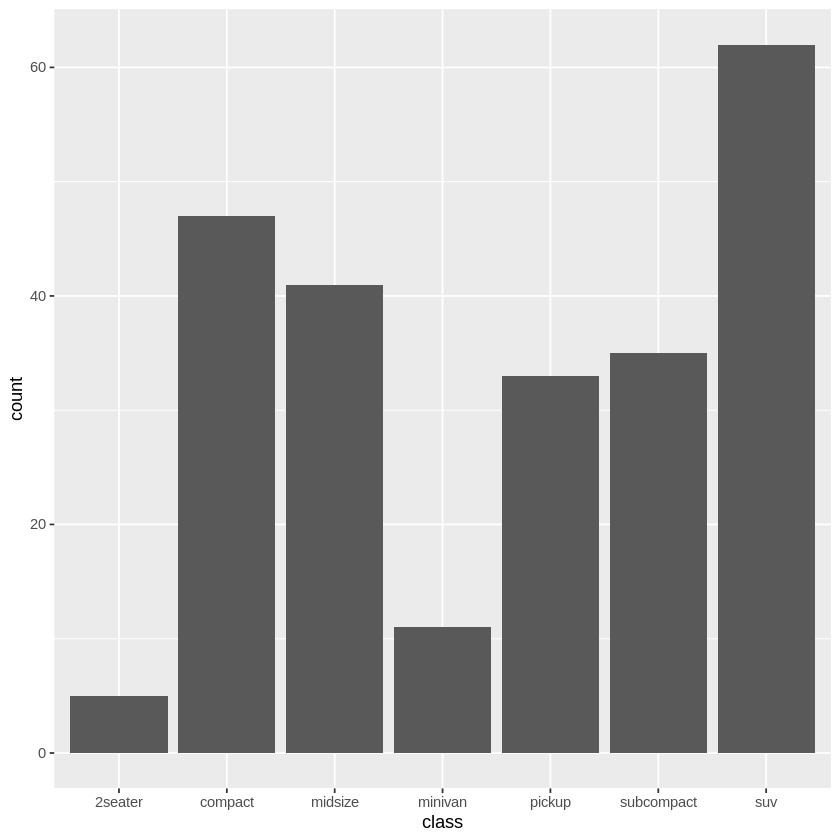

In [7]:
# 혼자서 해보기
# q1
# 구동방식별 평균 연비
mpg <- as.data.frame(ggplot2::mpg)
tail(mpg)
df_mpg <- mpg %>%
    filter(class=='suv') %>%
    group_by(manufacturer) %>%
    summarise(mean_cty = mean(cty)) %>%
    arrange(desc(mean_cty)) %>%
    head(5)
df_mpg
ggplot(data=df_mpg, aes(x=reorder(manufacturer,-mean_cty), y=mean_cty)) + geom_col()

# q2
ggplot(data=mpg, aes(x=class)) + geom_bar()

In [ ]:
# 선그래프
eco <- as.data.frame(ggplot2::economics)
summary(eco)
eco

ggplot(data = economics, aes(x = date, y = psavert)) + geom_line()

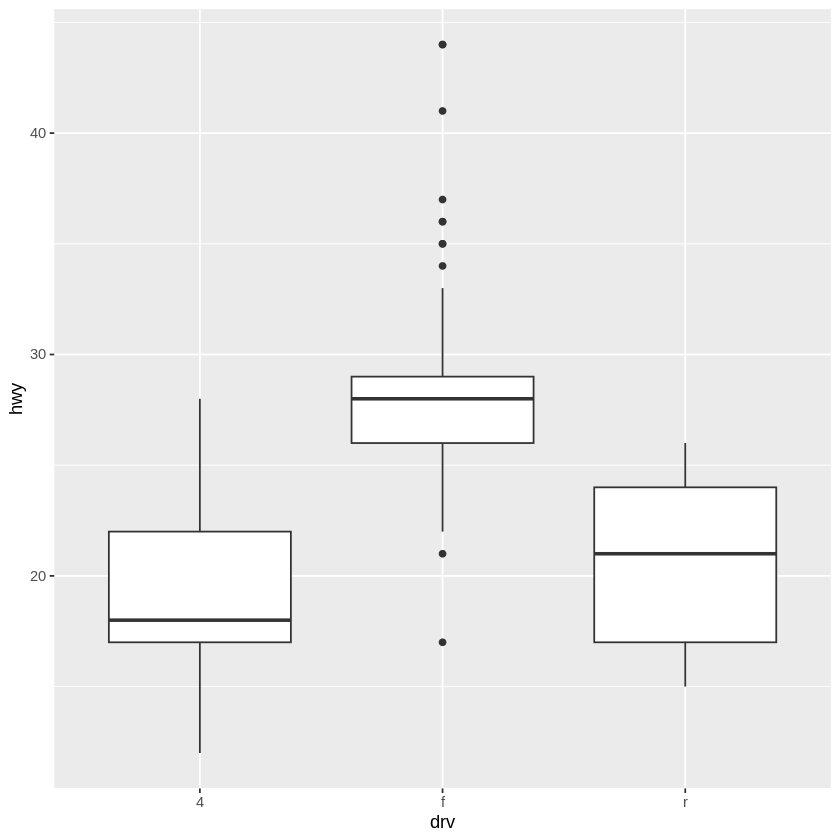

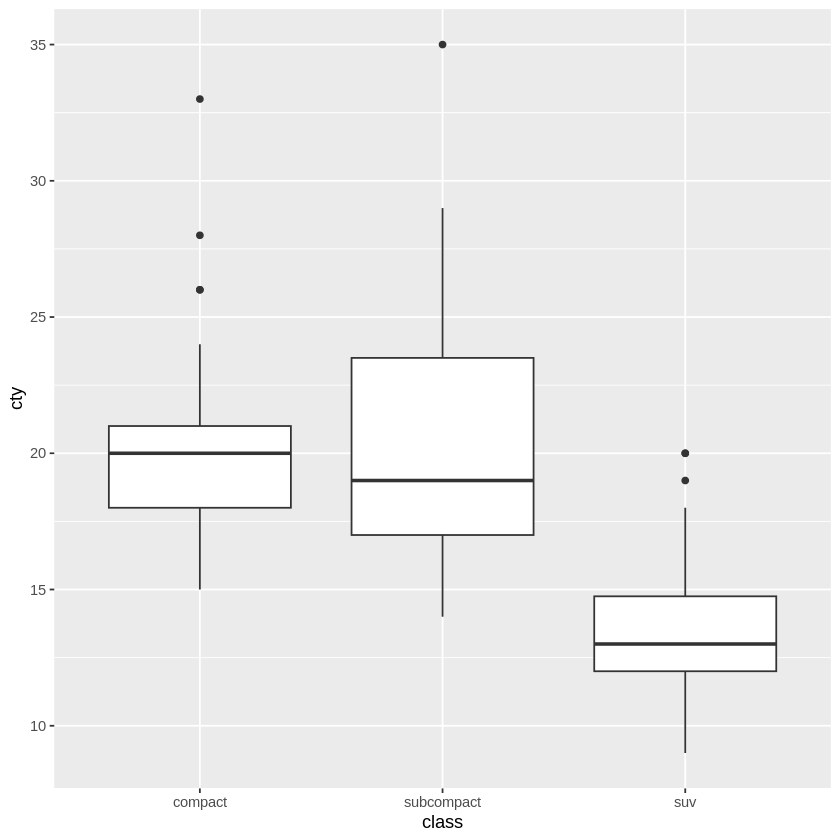

In [9]:
# box plot
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot()


# 혼자해보기
cty_mpg <- mpg %>% filter(class %in% c("compact","subcompact","suv")) %>%
    select(cty,class)
ggplot(data = cty_mpg, aes(x = class, y = cty)) + geom_boxplot()